In [36]:
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

import thesis
chapter = 'theory'
save = True

from kid_readout.measurement import basic, plot_basic
from kid_readout.measurement.io import npy

In [5]:
npd_3K = npy.NumpyDirectory('/data/readout/2017-12-05_130953_mmw.npd/')  # Same attenuations and bath temperature as 5 K
#npd_5Ka = npy.NumpyDirectory('/data/readout/2017-12-04_145404_mmw_eccosorb.npd/')
npd_5Kb = npy.NumpyDirectory('/data/readout/2017-12-04_170628_mmw_eccosorb.npd/')

In [ ]:
# The chosen one is band 7, number 3
ssl_3K = npd_3K.SweepStreamList14
ssl_5K = npd_5Kb.SweepStreamList8

In [9]:
chosen_number = 3
sssl_3K = ssl_3K[chosen_number]
sssl_5K = ssl_5K[chosen_number]
sss_off_3K = basic.SingleSweepStream(sweep=sssl_3K.single_sweep, stream=sssl_3K.stream_list[0])
sss_off_5K = basic.SingleSweepStream(sweep=sssl_5K.single_sweep, stream=sssl_5K.stream_list[0])

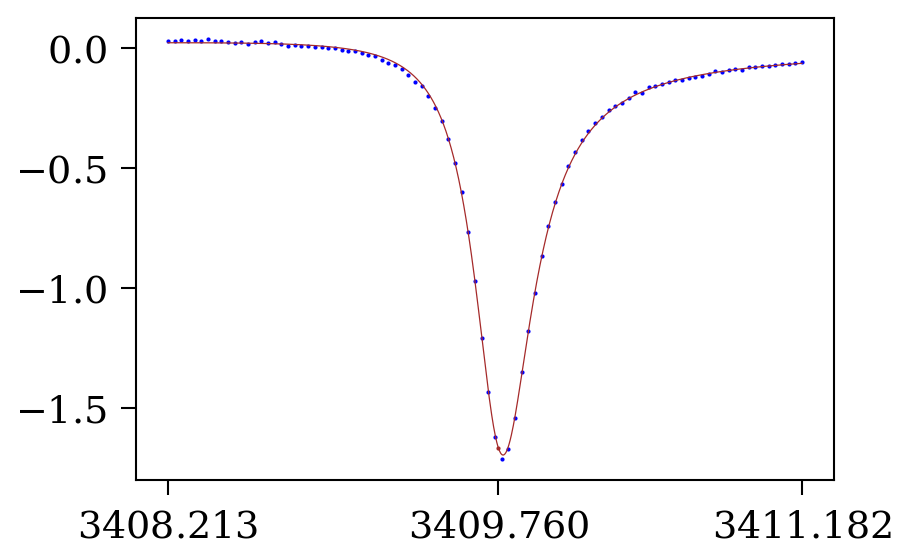

In [11]:
fig, ax = plt.subplots()
plot_basic.resonator_amplitude(axis=ax, resonator=sss_off_3K.resonator);

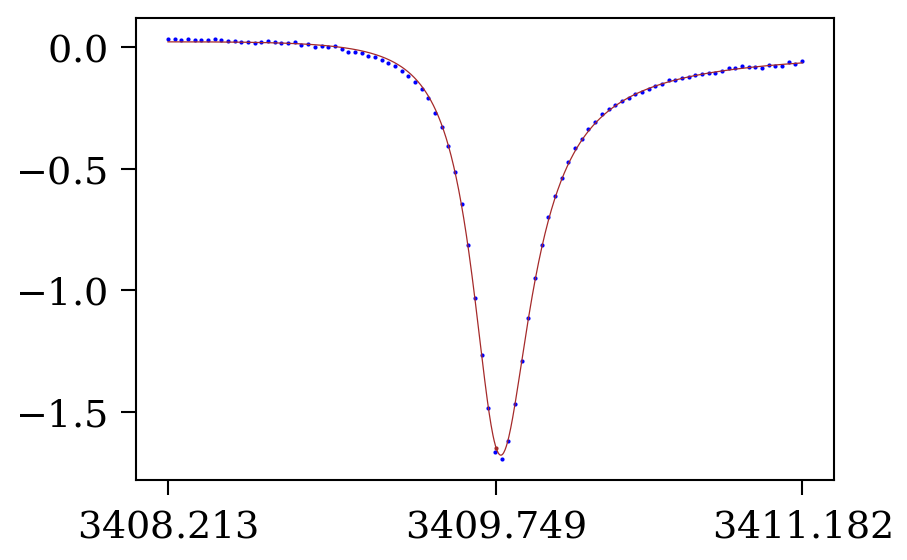

In [12]:
fig, ax = plt.subplots()
plot_basic.resonator_amplitude(axis=ax, resonator=sss_off_5K.resonator);

In [34]:
color_3K = 'C0'
color_5K = 'C3'

sweep_mean_3K = plot_basic.sweep_mean_defaults.copy()
sweep_mean_3K['color'] = color_3K
model_3K = plot_basic.model_defaults.copy()
model_3K['color'] = color_3K
resonance_3K = plot_basic.resonance_defaults.copy()
resonance_3K['color'] = color_3K
resonance_3K['markersize'] = 4

sweep_mean_5K = plot_basic.sweep_mean_defaults.copy()
sweep_mean_5K['color'] = color_5K
model_5K = plot_basic.model_defaults.copy()
model_5K['color'] = color_5K
resonance_5K = plot_basic.resonance_defaults.copy()
resonance_5K['color'] = color_5K
resonance_5K['markersize'] = 4

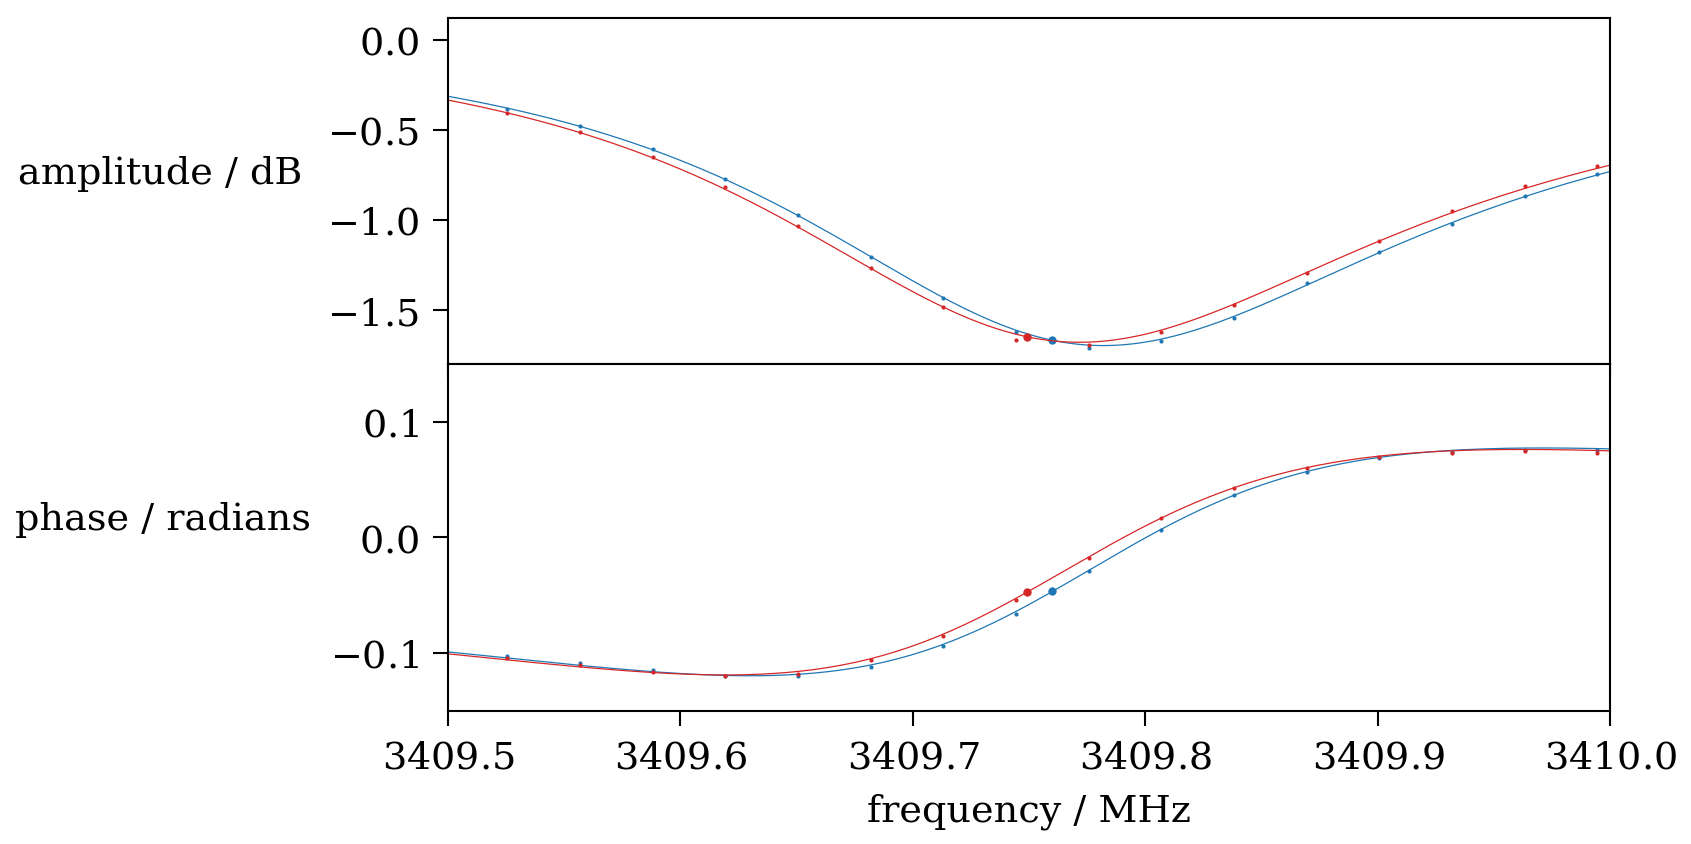

In [51]:
plt.rcParams['axes.formatter.useoffset'] = False
fig, (ax_amp, ax_phi) = plt.subplots(2, 1, figsize=(5, 3), sharex=True, gridspec_kw={'hspace': 0})
ax_amp.set_ylabel('amplitude / dB', rotation='horizontal', labelpad=40)
ax_phi.set_ylabel('phase / radians', rotation='horizontal', labelpad=40)
ax_phi.set_xlabel('frequency / MHz')
ax_phi.get_xaxis().get_major_formatter().set_useOffset = False

#ax_amp.axvline(1e-6 * sss_off_3K.resonator.f_0, color='gray')
#ax_phi.axvline(1e-6 * sss_off_3K.resonator.f_0, color='gray')


plot_basic.resonator_amplitude(axis=ax_amp, resonator=sss_off_3K.resonator,
                               sweep_mean_settings=sweep_mean_3K, model_settings=model_3K, resonance_settings=resonance_3K)
plot_basic.resonator_amplitude(axis=ax_amp, resonator=sss_off_5K.resonator,
                               sweep_mean_settings=sweep_mean_5K, model_settings=model_5K, resonance_settings=resonance_5K)

plot_basic.resonator_phase(axis=ax_phi, resonator=sss_off_3K.resonator,
                           sweep_mean_settings=sweep_mean_3K, model_settings=model_3K, resonance_settings=resonance_3K)
plot_basic.resonator_phase(axis=ax_phi, resonator=sss_off_5K.resonator,
                           sweep_mean_settings=sweep_mean_5K, model_settings=model_5K, resonance_settings=resonance_5K)

ax_phi.set_xlim(3409.5, 3410)
ax_phi.set_ylim(-0.15, 0.15)
ax_phi.set_xticks(np.linspace(3409.5, 3410.0, 6))

if save:
    fig.savefig(thesis.full_filename(chapter, 'introduction_resonator_amplitude_phase.pdf'))